# corner detection

In [50]:
import cv2
import numpy as np

import matplotlib.pyplot as plt


In [51]:
image=cv2.imread("./chessboard.png")
gray_scale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [52]:
gray_sclae=gray_scale.astype(np.float32)

# corner detction

In [53]:
corners=cv2.cornerHarris(gray_scale,2,3,0.04)

In [54]:
# corners.shape

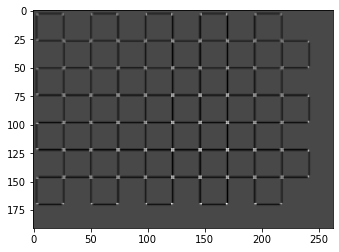

In [55]:
plt.imshow(corners,'gray')

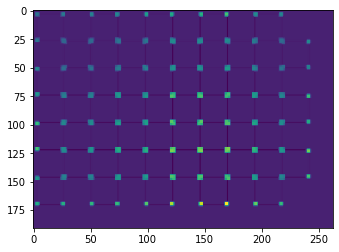

In [56]:
# dilation but not important
dilate_image=cv2.dilate(corners,None)
plt.imshow(dilate_image)

In [57]:
# plt.imshow(image.astype(np.uint8))

In [58]:
image[dilate_image > 0.01*dilate_image.max()]=[0,0,255]

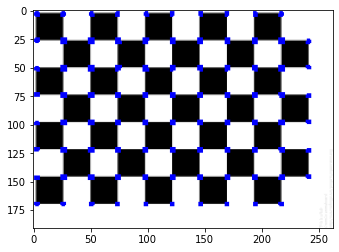

In [59]:
plt.imshow(image)

# Corner with SubPixel Accuracy

In [68]:
filename = './chessboard2.jpeg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [72]:
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [79]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [105]:
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[255,0,0]
img[res[:,3],res[:,2]] = [0,255,0]


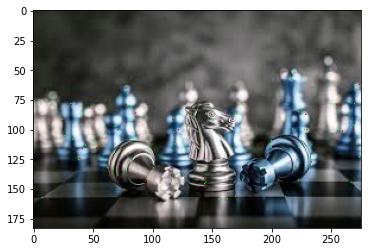

In [106]:
plt.imshow(img)

In [93]:
corners[1,:]

array([216.65216,  56.65935], dtype=float32)

In [85]:
# np.hstack((centroids))

In [102]:
# np.hstack((centroids,corners))